In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

In [8]:
# Reading the data

data = pd.read_csv('data/creditcard.csv')
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [9]:
# Splitting train and test

data_train, data_test = train_test_split(data, test_size=0.2, random_state=42, shuffle=True)
data_train = data_train.reset_index(drop=True)
data_test = data_test.reset_index(drop=True)

X_test = data_test.drop(['Class'], axis=1)
y_test = data_test['Class']

In [12]:
# Count of frauds

fraud = data_train[data_train['Class'] == 1].value_counts().sum()
not_fraud = data_train[data_train['Class'] == 0].value_counts().sum()

print ('Number of fraud cases: ', fraud, " - %", "{:.2f}".format(fraud/(fraud+not_fraud)*100))
print ('Number of non-fraud cases: ', not_fraud, " - %", "{:.2f}".format(not_fraud/(fraud+not_fraud)*100))

Number of fraud cases:  394  - % 0.17
Number of non-fraud cases:  227451  - % 99.83


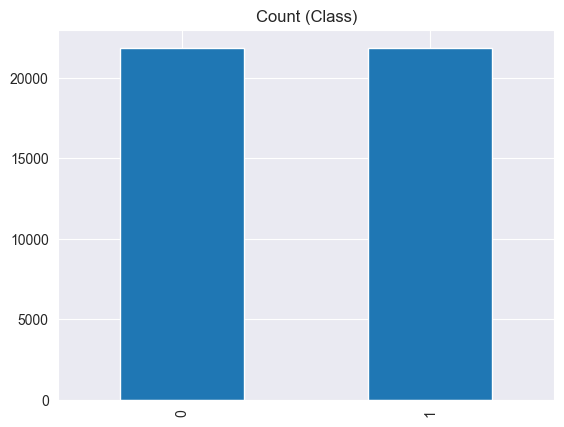

In [13]:
# Resampling

over = SMOTETomek(sampling_strategy=0.10)
under = RandomUnderSampler(sampling_strategy=1)
steps = [('1', over), ('0', under)]
pipeline = Pipeline(steps=steps)

X_train, y_train = pipeline.fit_resample(data_train.drop(['Class'], axis=1), data_train['Class'])
X_train = pd.DataFrame(X_train, columns=data_train.drop(['Class'], axis=1).columns)
y_train = pd.DataFrame(y_train, columns=['Class'])
data_train = pd.concat([X_train, y_train], axis=1)

data_train['Class'].value_counts().plot(kind='bar', title='Count (Class)')
plt.show()

In [14]:
# Scaling and standardization

data_train = data_train.reset_index(drop=True)
X_train = data_train.drop(['Class'], axis=1)
y_train = data_train['Class']

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

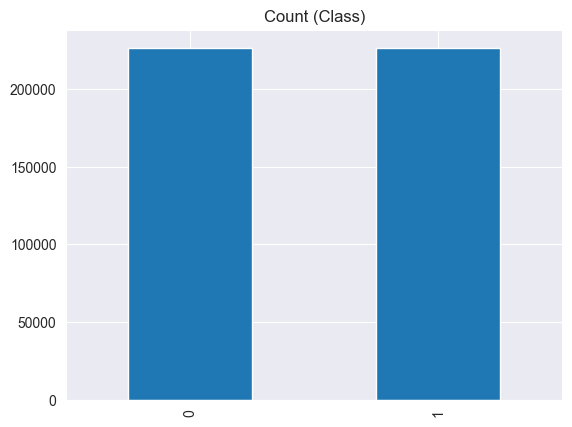

In [15]:
# Oversampling

data_train, data_test = train_test_split(data, test_size=0.2, random_state=42, shuffle=True)
data_train = data_train.reset_index(drop=True)
data_test = data_test.reset_index(drop=True)

X_test = data_test.drop(['Class'], axis=1)
y_test = data_test['Class']

over = SMOTETomek(sampling_strategy=1)
under = RandomUnderSampler(sampling_strategy=1)
steps = [('1', over), ('0', under)]
pipeline = Pipeline(steps=steps)

X_train, y_train = pipeline.fit_resample(data_train.drop(['Class'], axis=1), data_train['Class'])
X_train = pd.DataFrame(X_train, columns=data_train.drop(['Class'], axis=1).columns)
y_train = pd.DataFrame(y_train, columns=['Class'])
data_train = pd.concat([X_train, y_train], axis=1)

data_train['Class'].value_counts().plot(kind='bar', title='Count (Class)')
plt.show()

In [16]:
data_train = data_train.reset_index(drop=True)
X_train = data_train.drop(['Class'], axis=1)
y_train = data_train['Class']

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [17]:
# SVM Train

svm = SVC(kernel='poly', C=0.1, gamma=1, random_state=42)
svm.fit(X_train, y_train)

SVC(C=0.1, gamma=1, kernel='poly', random_state=42)

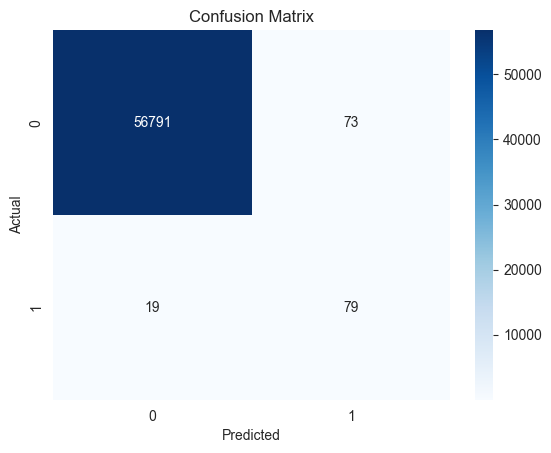

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.52      0.81      0.63        98

    accuracy                           1.00     56962
   macro avg       0.76      0.90      0.82     56962
weighted avg       1.00      1.00      1.00     56962

[[56791    73]
 [   19    79]]
Accuracy:  0.9983848881710614
Precision:  0.5197368421052632
Recall:  0.8061224489795918
F1:  0.632


In [19]:
# SVM Test

y_pred = svm.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print('Accuracy: ', accuracy_score(y_test, y_pred))
print('Precision: ', precision_score(y_test, y_pred))
print('Recall: ', recall_score(y_test, y_pred))
print('F1: ', f1_score(y_test, y_pred))

In [20]:
# Logistic Regression train

Lr = LogisticRegression(random_state=42, max_iter=1000, solver='liblinear')
Lr.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

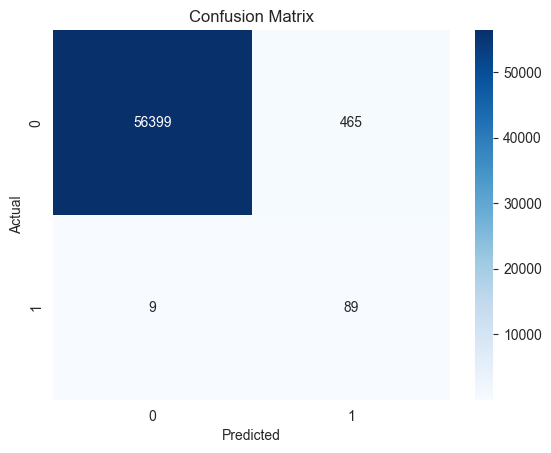

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56864
           1       0.16      0.91      0.27        98

    accuracy                           0.99     56962
   macro avg       0.58      0.95      0.63     56962
weighted avg       1.00      0.99      0.99     56962

[[56399   465]
 [    9    89]]
Accuracy:  0.9916786629682947
Precision:  0.16064981949458484
Recall:  0.9081632653061225
F1:  0.27300613496932513


In [22]:
# Logistic Regression test

y_pred = Lr.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print('Accuracy: ', accuracy_score(y_test, y_pred))
print('Precision: ', precision_score(y_test, y_pred))
print('Recall: ', recall_score(y_test, y_pred))
print('F1: ', f1_score(y_test, y_pred))